In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA


In [57]:
data = pd.read_csv('bank-additional-full.csv',sep=";")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

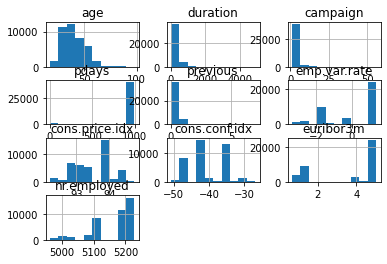

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

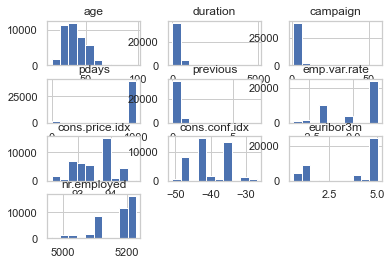

In [32]:
data.hist()

<AxesSubplot:title={'center':'Pearson'}>

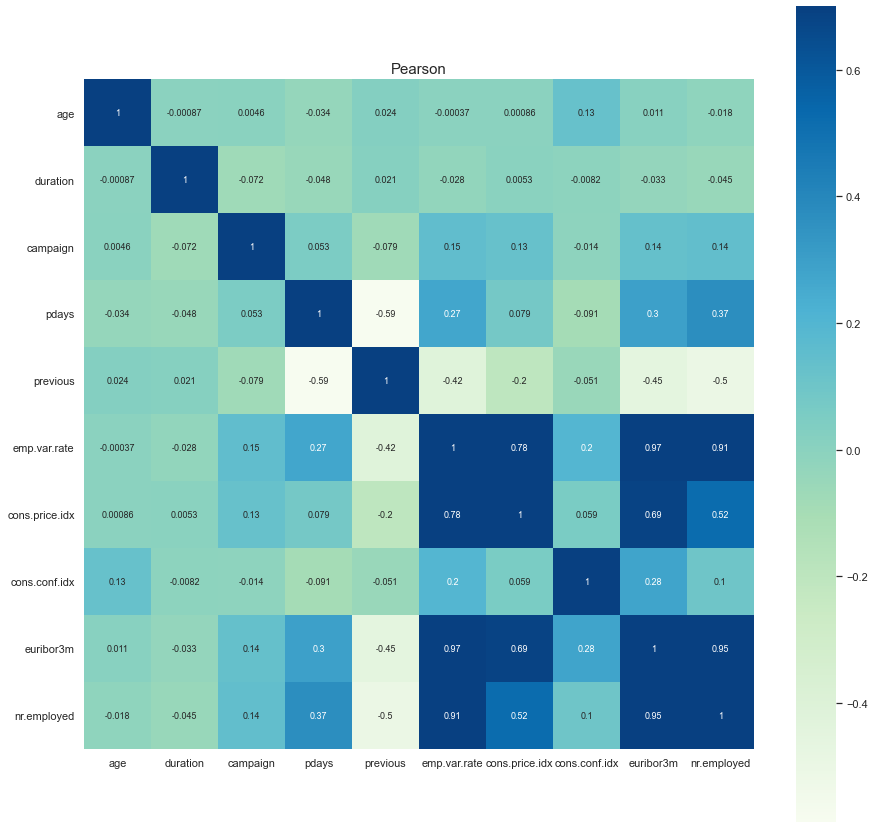

<AxesSubplot:title={'center':'Pearson'}>

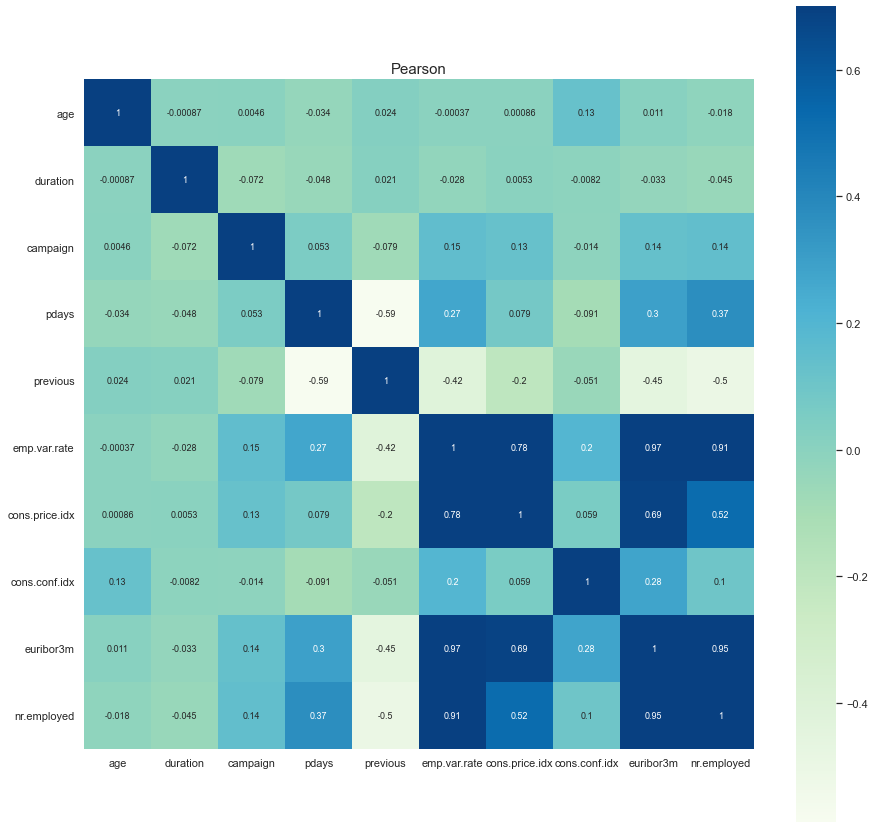

In [33]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson',fontsize=15)
sns.heatmap(data.corr(),vmax = 0.7,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':9})



In [79]:
x_aux = data.iloc[:,0:20]
x_aux = x_aux.drop(['pdays'],axis=1)
X = pd.get_dummies(x_aux)
y = data.iloc[:,20]

In [83]:
X

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [36]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [37]:
X.shape

(41188, 62)

(41188, 62)

In [38]:
y.shape

(41188,)

(41188,)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

<AxesSubplot:title={'center':'Pearson'}>

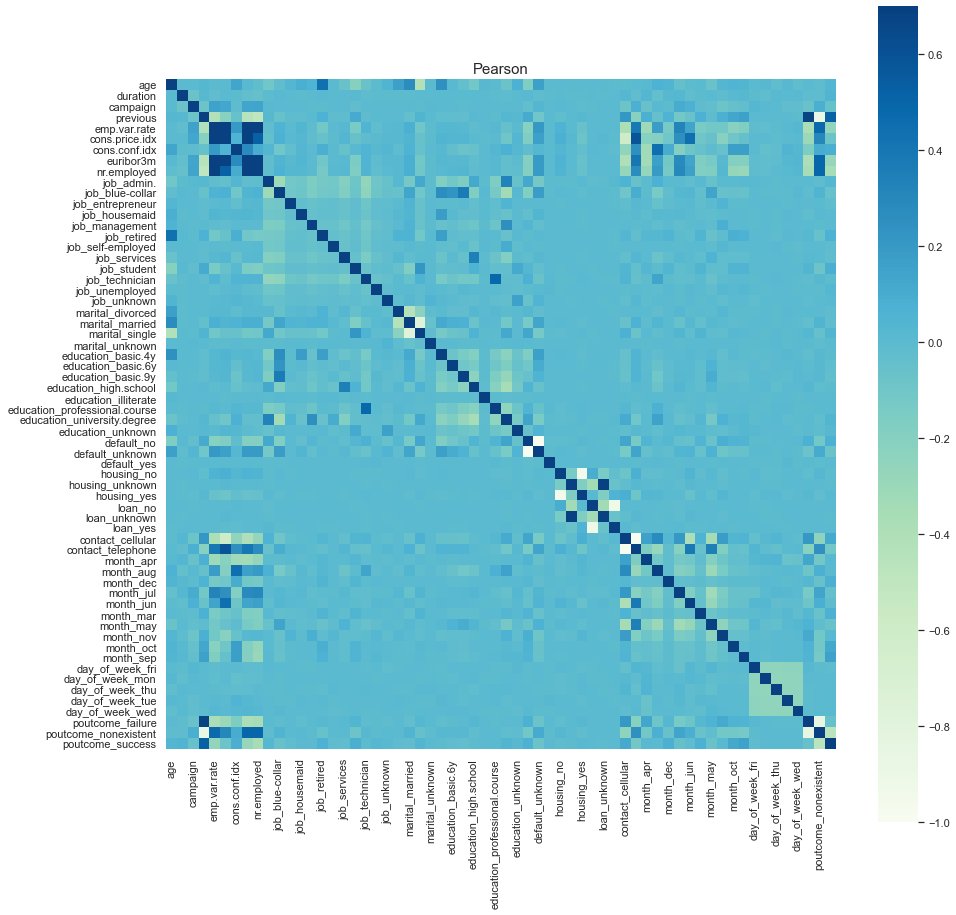

<AxesSubplot:title={'center':'Pearson'}>

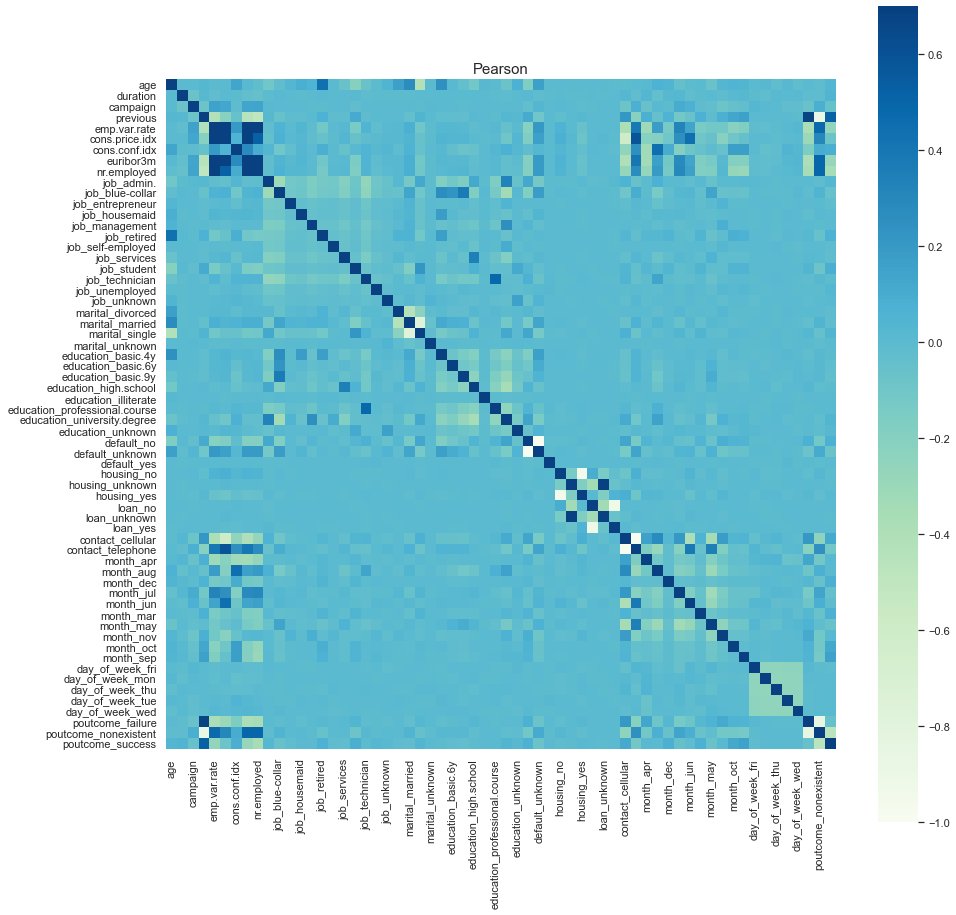

In [40]:
sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson',fontsize=15)
sns.heatmap(X.corr(),vmax = 0.7,square=True,cmap='GnBu',linecolor='b',annot=False,annot_kws={'size':9})

In [41]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

no     36548
yes     4640
Name: y, dtype: int64

In [84]:
lenc = LabelEncoder()
y = lenc.fit_transform(y)

**UnderSampler**

In [110]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X,y)
pd.Series(y_rus).value_counts()

0    4640
1    4640
dtype: int64

**OverSampler**

In [104]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X,y)
pd.Series(y_ros).value_counts()

0    36548
1    36548
dtype: int64

**SMOTE**

In [ ]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X,y)
pd.Series(y_sm).value_counts()

In [46]:
y_sm

array([0, 0, 0, ..., 1, 1, 1])

array([0, 0, 0, ..., 1, 1, 1])

**FUNCIONES**
*TrainTestSplit*
*Scalado*
*PCA*

In [74]:
def trainTestSplit(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

def escalado(X_train,X_test):
  sc = StandardScaler()
  sc.fit(X_train)
  return sc.transform(X_train),sc.transform(X_test)

def generarPCA(n_componentes,X):
  pca = PCA(n_components=n_componentes)
  cp = pca.fit_transform(X)
  return pd.DataFrame(data=cp)

In [135]:
#X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_rus),y_rus)
#sin escalado sin pca y sin balanceo
#X_train,X_test,y_train,y_test = trainTestSplit(X,y)
#sin escalado con pca y sin balanceo
#X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X),y)
#sin escalado sin pca y con balanceo Over
#X_train,X_test,y_train,y_test = trainTestSplit(X_ros,y_ros)
#sin escalado sin pca y con balanceo under
#X_train,X_test,y_train,y_test = trainTestSplit(X_rus,y_rus)
#sin escalado sin pca y con balanceo smote
#X_train,X_test,y_train,y_test = trainTestSplit(X_sm,y_sm)
#Sin escalado con PCA con balaceo Over
#X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_ros),y_ros)
#Sin escalado con PCA con balaceo Over
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_rus),y_rus)

In [136]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [137]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=20,verbose=1)

Epoch 1/20
26/26 [==============================] - 1s 7ms/step - loss: 3.9276 - accuracy: 0.7877 - val_loss: 2.7473 - val_accuracy: 0.7992
Epoch 2/20
26/26 [==============================] - 0s 2ms/step - loss: 1.3131 - accuracy: 0.7836 - val_loss: 1.0326 - val_accuracy: 0.8035
Epoch 3/20
26/26 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.7970 - val_loss: 0.6590 - val_accuracy: 0.8139
Epoch 4/20
26/26 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.8050 - val_loss: 0.5167 - val_accuracy: 0.8193
Epoch 5/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8200 - val_loss: 0.4510 - val_accuracy: 0.8294
Epoch 6/20
26/26 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8331 - val_loss: 0.4349 -

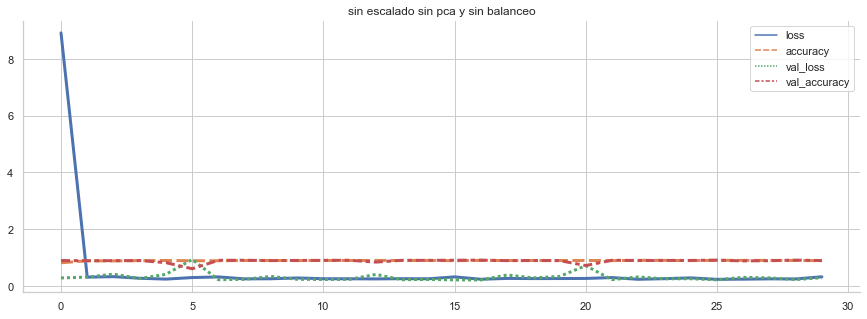

In [88]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('sin escalado sin pca y sin balanceo')
sns.lineplot(data=loss,lw=3)
sns.despine()

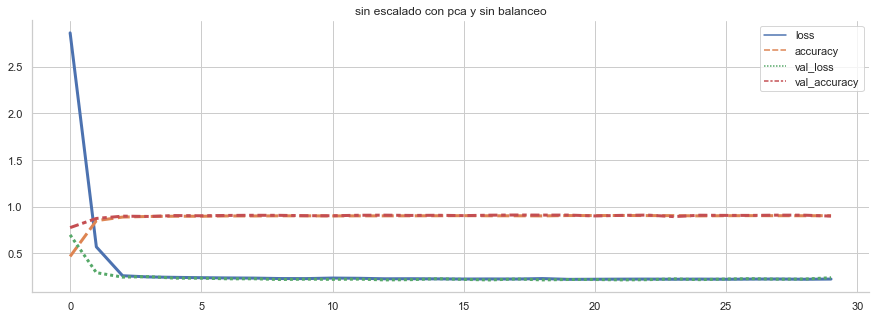

In [99]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('sin escalado con pca y sin balanceo')
sns.lineplot(data=loss,lw=3)
sns.despine()


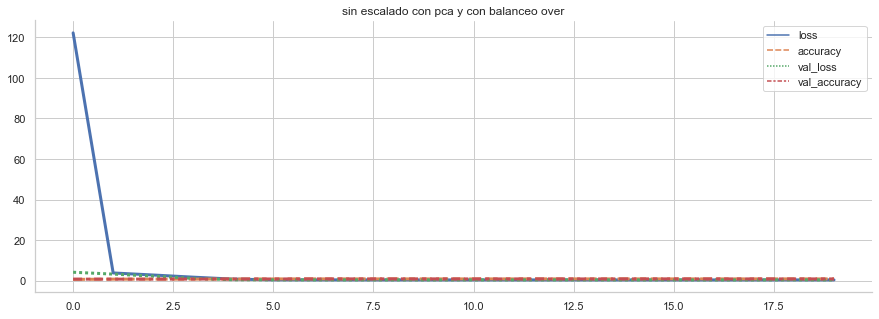

In [125]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('sin escalado con pca y con balanceo over')
sns.lineplot(data=loss,lw=3)
sns.despine()

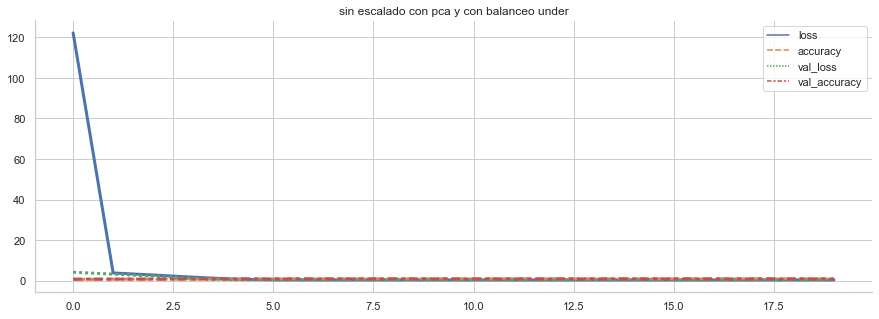

In [124]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('sin escalado con pca y con balanceo under')
sns.lineplot(data=loss,lw=3)
sns.despine()

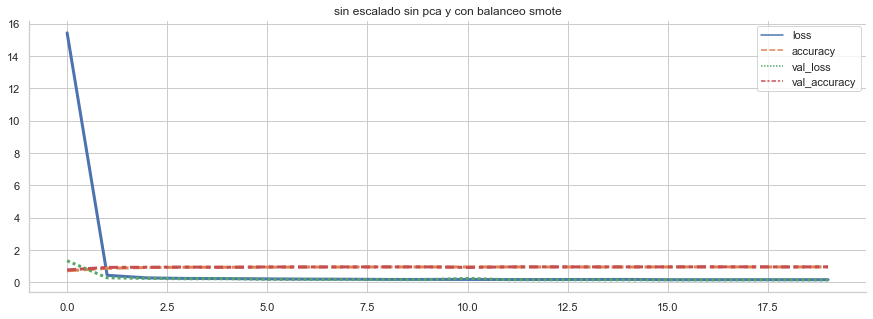

In [129]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('sin escalado sin pca y con balanceo smote')
sns.lineplot(data=loss,lw=3)
sns.despine()

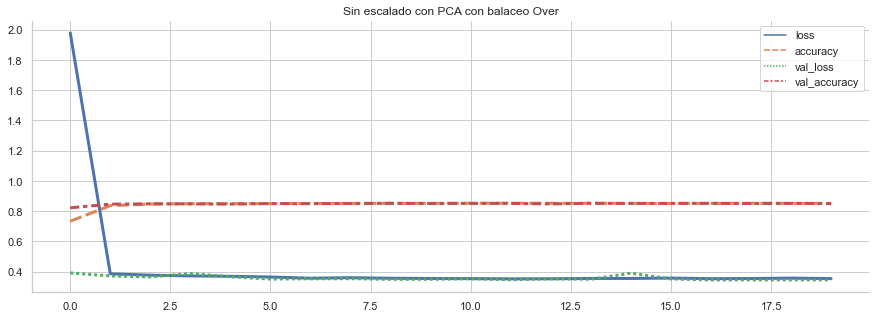

In [133]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('Sin escalado con PCA con balaceo Over')
sns.lineplot(data=loss,lw=3)
sns.despine()

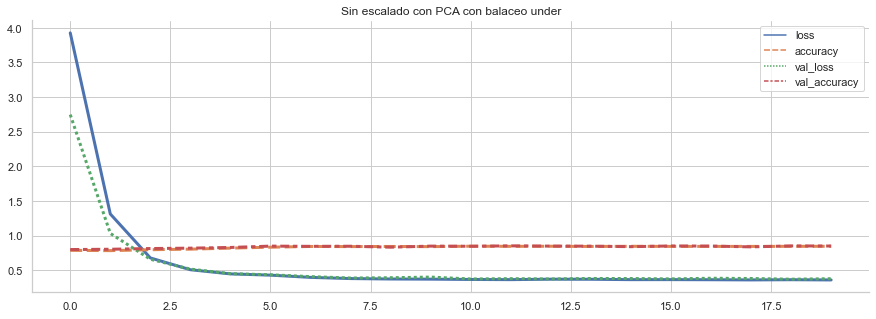

In [138]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
plt.title('Sin escalado con PCA con balaceo under')
sns.lineplot(data=loss,lw=3)
sns.despine()